### <center>Prediction of LC50 value using QSAR model</center>

### Exploratory Data Analysis

#### 1) Problem statement 

The aim of this project is to develop a Quantitative Structure-Activity Relationship (QSAR) model to predict the acute LC50 value for chemical substances. The LC50 value represents the concentration of a compound that causes 50% lethality of fish in a test batch over a duration of 96 hours. Predicting these values is crucial for assessing the ecological toxicity of chemicals, helping to protect aquatic life by identifying potentially harmful substances before they are released into the environment.

#### 2) Data Collection

The dataset is sourced from the ECOTOX database of the US Environmental Protection Agency and additional data from ECHA. 
https://archive.ics.uci.edu/dataset/504/qsar+fish+toxicity

##### Importing data and required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing csv file as pandas dataframe

df = pd.read_csv('data/qsar_fish_toxicity.csv',sep=';',header=None)

In [4]:
# Naming features from their specific molecular descriptor name

column_names = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH',  'NdssC', 'MLOGP', 'LC50']
df.columns = column_names

In [5]:
# Displaying first five records

df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [6]:
# Shape of the dataset

df.shape

(908, 7)

#### 3) Exploring Data

##### Feature Information

- CIC0: Information content index (neighborhood symmetry of 0-order).
- SM1_Dz(Z): First Zagreb index (the sum of the squares of vertex degrees).
- GATS1i: Geary autocorrelation of lag 1 weighted by ionization potential.
- NdsCH: Number of double bonds between carbon and hydrogen.
- NdssC: Number of double bonds between sulfur and carbon.
- MLOGP: Molecular log partition coefficient (a measure of hydrophobicity).
- LC50: Median lethal concentration (the concentration of a substance that causes 50% mortality in a test population).

These features are used to predict the LC50 value, which indicates the toxicity of a chemical substance.

In [7]:
# Statistical summary of the dataset

df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


##### Statistical Inferences

<ul>
<li>Mean LC50: 4.064431, indicating the average LC50 value across the dataset</li>
<li>Standard Deviation of LC50: 1.455698, showing the extent of variation from the mean</li>
<li>Range of LC50: 0.053000 to 9.612000, indicating the minimum and maximum values</li>
<li>NdsCH, NdssC: Significant portions of the data have zero values (min and 25th percentile are 0)</li>
</ul>

In [8]:
# Checking datatypes and null values of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CIC0       908 non-null    float64
 1   SM1_Dz(Z)  908 non-null    float64
 2   GATS1i     908 non-null    float64
 3   NdsCH      908 non-null    int64  
 4   NdssC      908 non-null    int64  
 5   MLOGP      908 non-null    float64
 6   LC50       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


All columns contain numerical values and there is no null values 

In [9]:
num_duplicates_before = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {num_duplicates_before}")

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicates after removal
num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")

Number of duplicate rows before removal: 1
Number of duplicate rows after removal: 0


In [10]:
# defining numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50']

We have 0 categorical features : []


##### Data Visualization

**Histograms of features to understand the distribution**

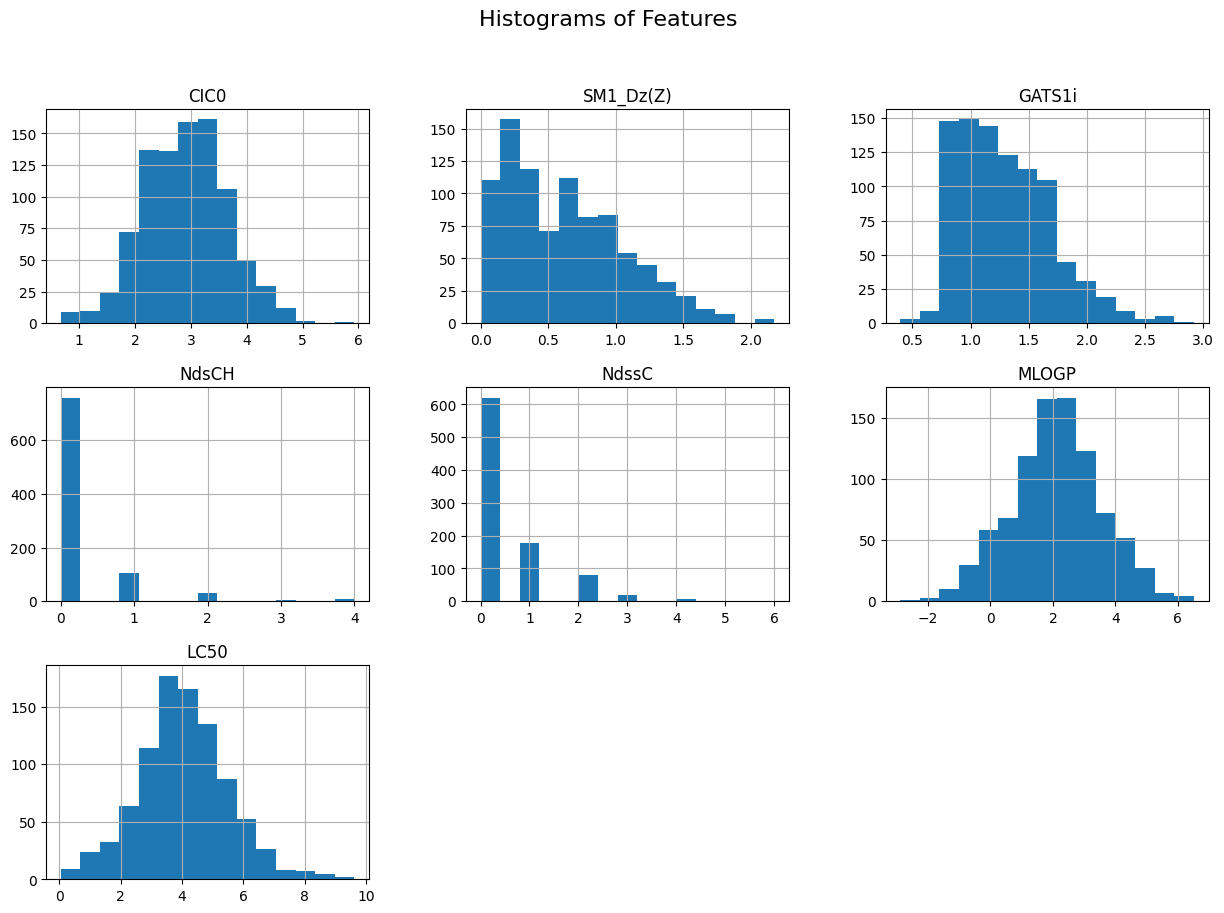

In [14]:
# Plot histograms for each feature to understand their distribution
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

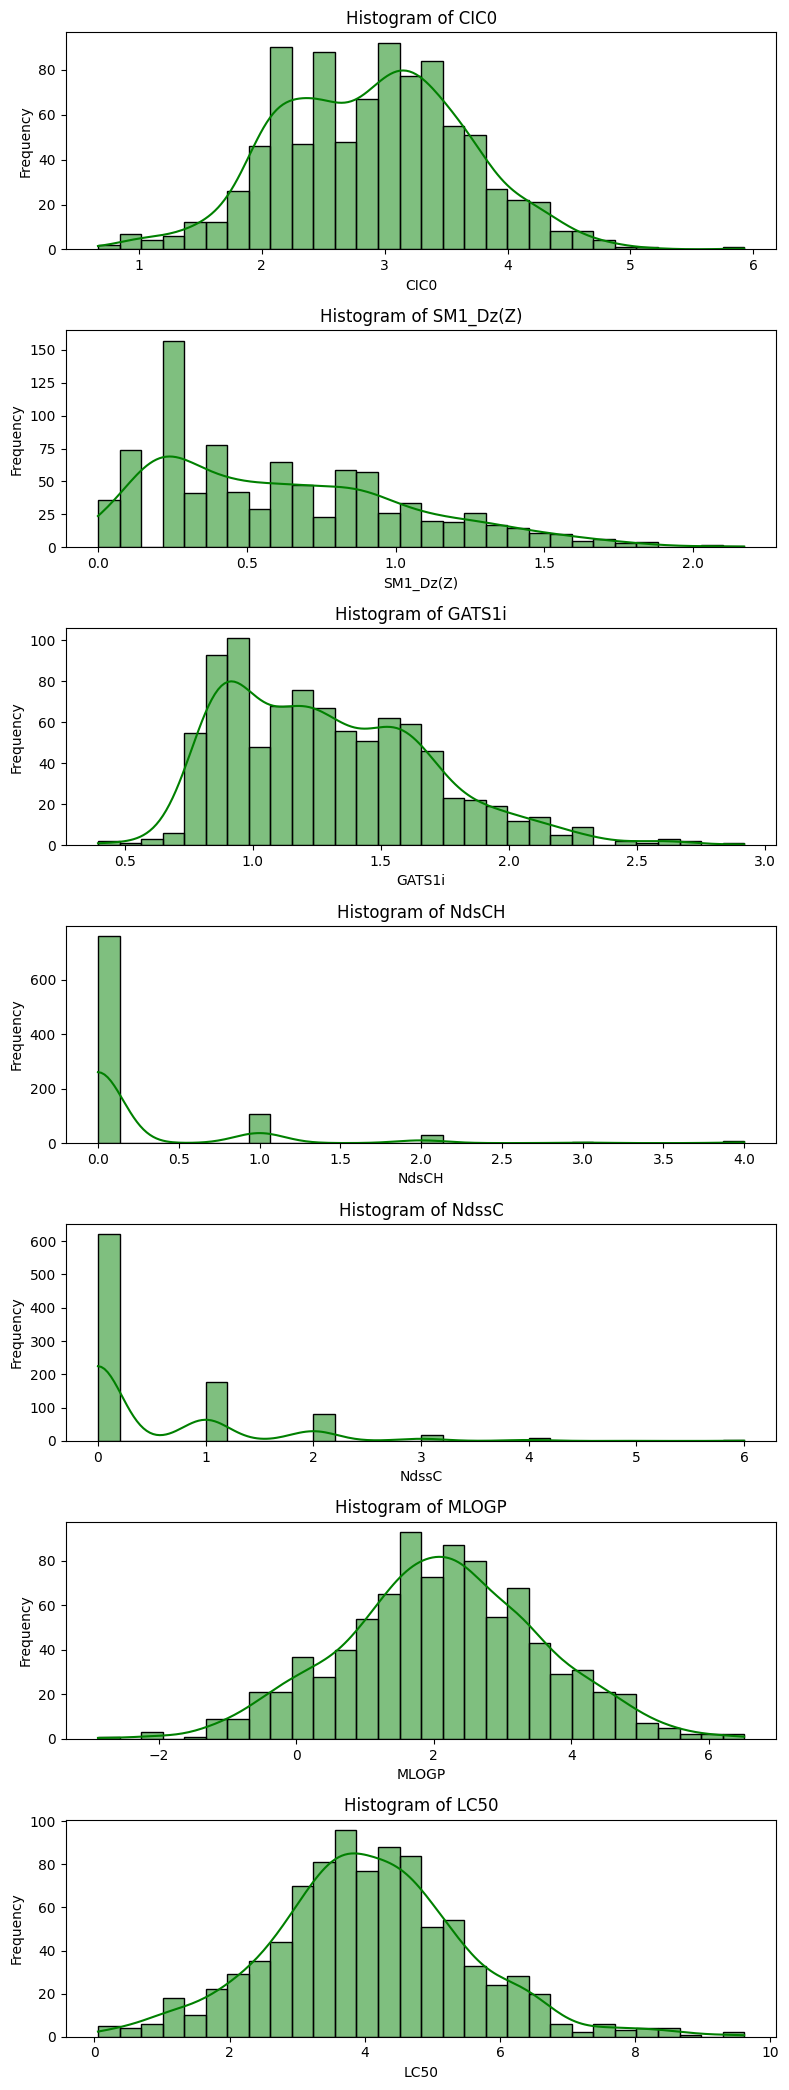

In [31]:
num_columns = len(df.columns)
fig, axs = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 3 * num_columns))

# Loop through each column and create a histogram
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column], bins=30, kde=True, color='g', ax=axs[i])
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()


**Insights:**

The features have varying distributions:

- CIC0, SM1_Dz(Z), LC50 seem to have a relatively normal distribution.
- GATS1i: Skewed slightly to the right.
- NdsCH, NdssC: These are mostly zero, with few higher values, indicating sparse data.

**Correlation matrix to see the relationships between features and with the target variable**

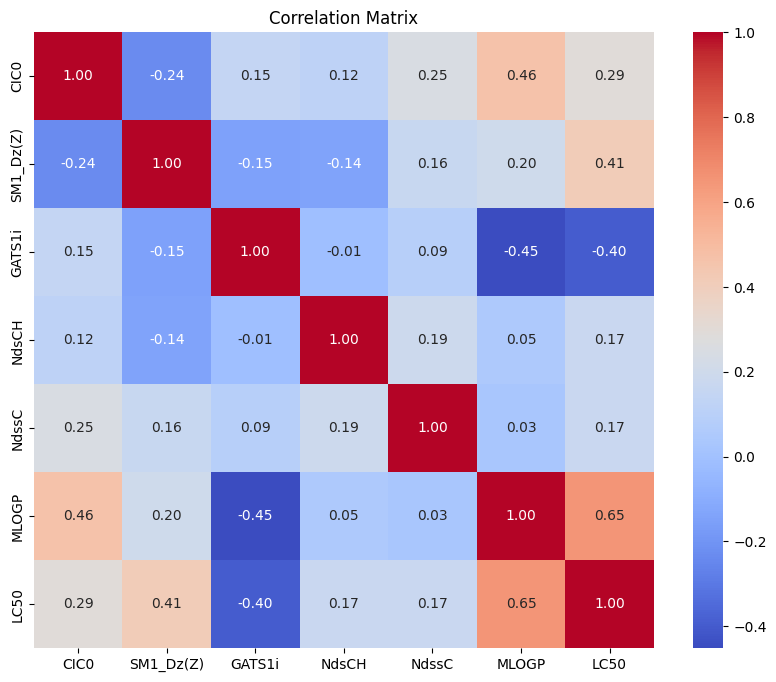

In [34]:
# Plotting the correlation matrix to identify relationships between features and with LC50
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [35]:
correlation_matrix

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235461,0.147199,0.121153,0.246397,0.463794,0.291799
SM1_Dz(Z),-0.235461,1.000000,-0.146144,-0.141461,0.163138,0.200638,0.410881
GATS1i,0.147199,-0.146144,1.000000,-0.011036,0.091910,-0.451240,-0.398328
NdsCH,0.121153,-0.141461,-0.011036,1.000000,0.187976,0.048507,0.171944
NdssC,0.246397,0.163138,0.091910,0.187976,1.000000,0.028328,0.172310
MLOGP,0.463794,0.200638,-0.451240,0.048507,0.028328,1.000000,0.651648
LC50,0.291799,0.410881,-0.398328,0.171944,0.172310,0.651648,1.000000


**Insights:**

- MLOGP has the highest positive correlation with LC50 (0.65), indicating it's a significant predictor
- SM1_Dz(Z) also shows a strong positive correlation with LC50 (0.41)
- GATS1i is negatively correlated with LC50 (-0.40), which might suggest an inverse relationship
- CIC0 has a moderate positive correlation with LC50 (0.29)
- Other features like NdsCH and NdssC have weaker correlations

**Multi-collinearity check using Variance Inflation Factor(VIF)**

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def compute_vif(considered_features, df):
    X = df[considered_features].copy()  
    X['intercept'] = 1

    vif = pd.DataFrame()
    vif["Variable"] = X.columns

    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    vif = vif[vif['Variable'] != 'intercept']

    return vif



In [58]:
features_to_check_vif = list(df.columns.drop(['LC50','LC50_Category']))

In [60]:
compute_vif(features_to_check_vif, df)

,Variable,VIF
0,CIC0,2.130918
1,SM1_Dz(Z),1.397713
2,GATS1i,1.606389
3,NdsCH,1.078559
4,NdssC,1.231654
5,MLOGP,2.354547


**Interpretation:**

- A VIF of 1 indicates no correlation between the independent variable and others
- A VIF between 1 and 5 suggests moderate correlation, which may not be problematic
- A VIF greater than 5 or 10 indicates high multicollinearity, suggesting that the variable is highly correlated with others


**Insights:**

- None of the VIF values exceed 5, which suggests that multicollinearity is not a major concern in this dataset


**More about LC50:**

- LC50 (Lethal Concentration 50%) is a standard measure used in toxicology to assess the toxicity of a substance. It represents the concentration of a substance required to kill 50% of a test population, usually within a specified time. The lower the LC50 value, the more toxic the substance.
- We can categorize LC50 values into different classes a according to the toxicity (LC50 values are measured in: −log(mol/L)).
    - Extremely Toxic: LC50 > 6
    - Highly Toxic: 5 ≤ LC50 ≤ 6
    - Moderately Toxic: 4 ≤ LC50 < 5
    - Slightly Toxic: 3 ≤ LC50 < 4
    - Practically Non-toxic: LC50 < 3

##### Feature Engineering

Creating a new binary feature that categorizes LC50 values into two groups, such as "Toxic" (e.g., LC50 ≤ 5) and "Non-Toxic" (e.g., LC50 > 5)

In [78]:
# Defining a function to categorize LC50 values
def categorize_lc50(value):
    if value > 5:
        return 'Toxic'  
    else:
        return 'Non-toxic'

df['LC50_Category'] = df['LC50'].apply(categorize_lc50)


In [37]:
df

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50,LC50_Category
0,3.260,0.829,1.676,0,1,1.453,3.770,Non-toxic
1,2.189,0.580,0.863,0,0,1.348,3.115,Non-toxic
2,2.125,0.638,0.831,0,0,1.348,3.531,Non-toxic
3,3.027,0.331,1.472,1,0,1.807,3.510,Non-toxic
4,2.094,0.827,0.860,0,0,1.886,5.390,Toxic
...,...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109,Non-toxic
904,3.652,0.872,0.867,2,3,3.983,4.040,Non-toxic
905,3.763,0.916,0.878,0,6,2.918,4.818,Non-toxic
906,2.831,1.393,1.077,0,1,0.906,5.317,Toxic


Text(0.5, 1.0, 'Distribution of Toxic and Non-Toxic Compounds')

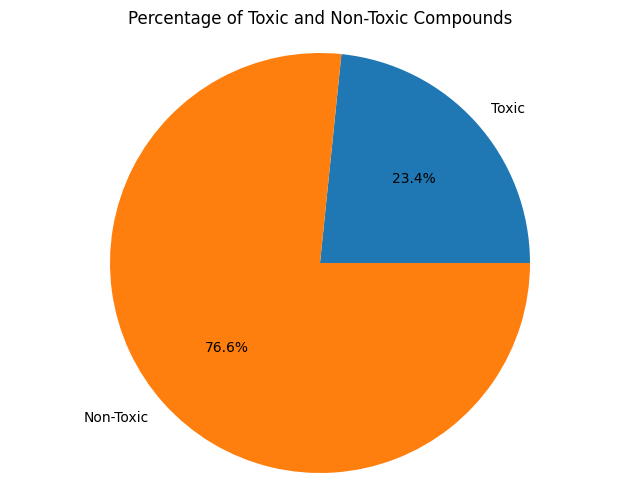

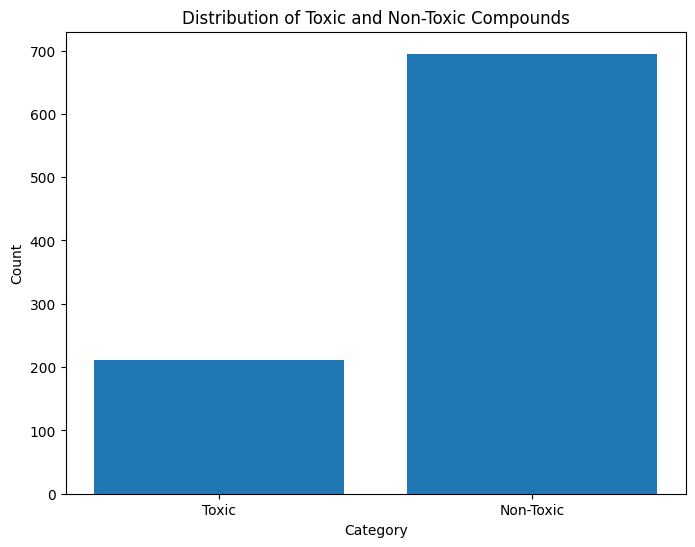

In [43]:
toxic_count = df[df['LC50_Category'] == 'Toxic'].shape[0]
non_toxic_count = df[df['LC50_Category'] == 'Non-toxic'].shape[0]

total_count = toxic_count + non_toxic_count
toxic_percentage = (toxic_count / total_count) * 100
non_toxic_percentage = (non_toxic_count / total_count) * 100

labels = ['Toxic', 'Non-Toxic']
counts = [toxic_count, non_toxic_count]
sizes = [toxic_percentage, non_toxic_percentage]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage of Toxic and Non-Toxic Compounds')

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Toxic and Non-Toxic Compounds')




**Multivariate analysis using pairplot**

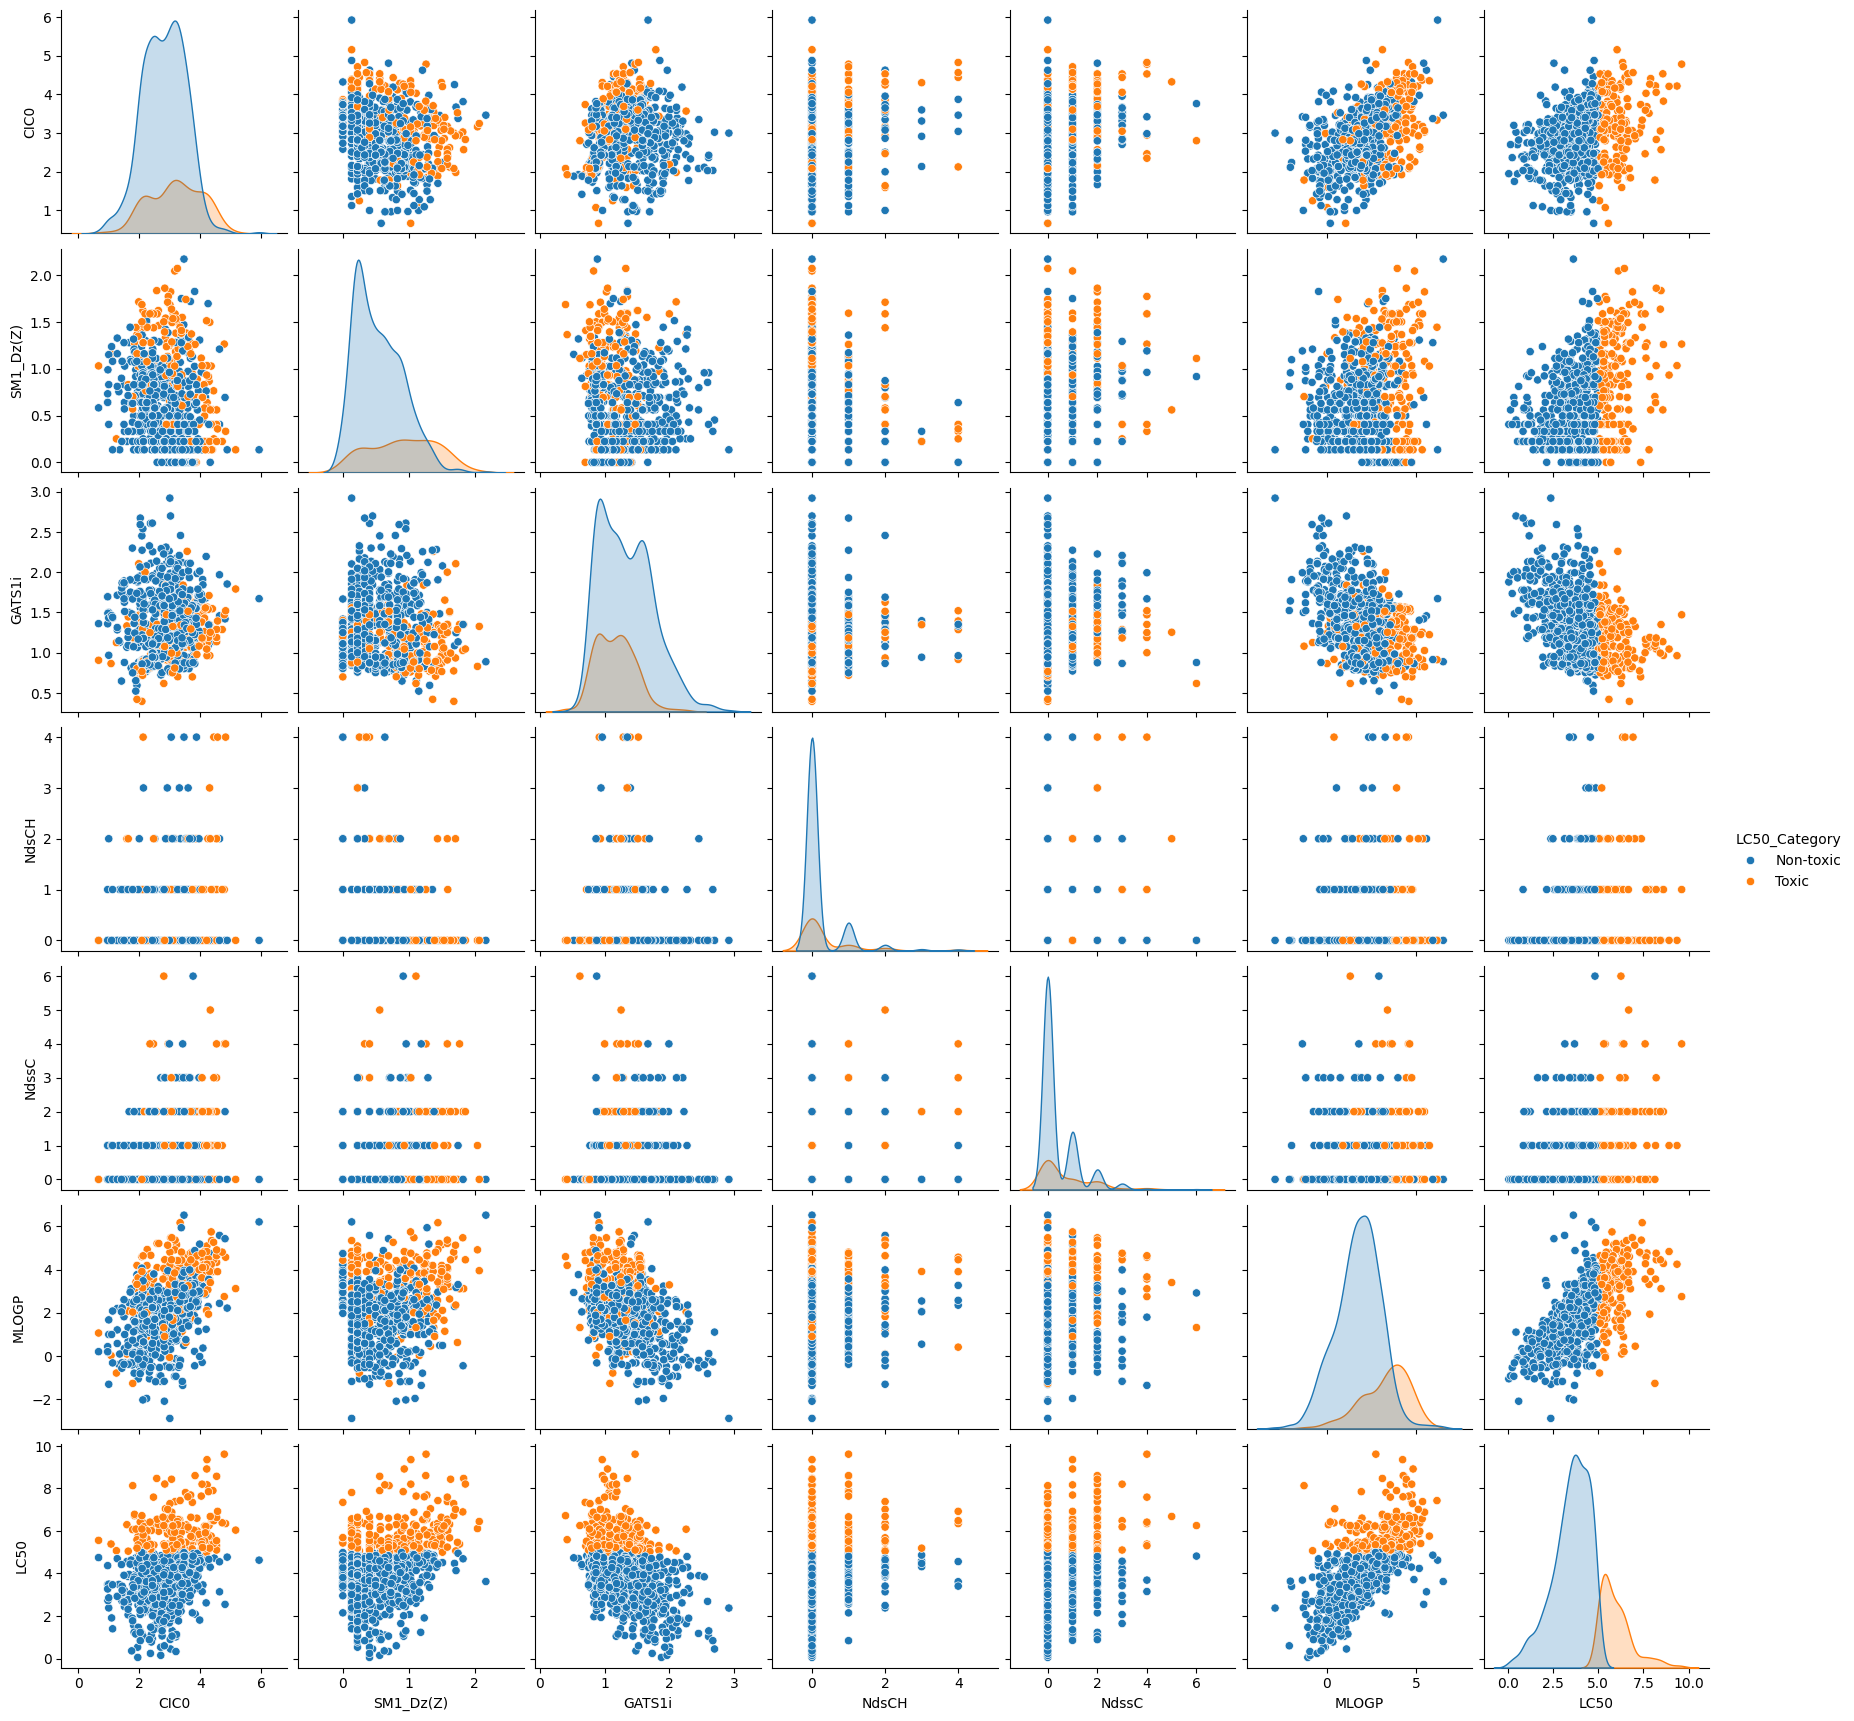

In [62]:
sns.pairplot(df,hue = 'LC50_Category')
plt.show()

**Insights:**

- The diagonal plots clearly represents the distribution of both the classes, the distribution pattern in both majority and minority class remain same in most the classmethod
- Eventhough the LC50 target column shows a significant difference in two classes, features like 'CIC0', 'SM1_Dz(Z)', 'GATS1i' don't show that much of a difference between two classes

##### Outlier detection

Text(0.5, 1.0, 'Boxplots of All Features')

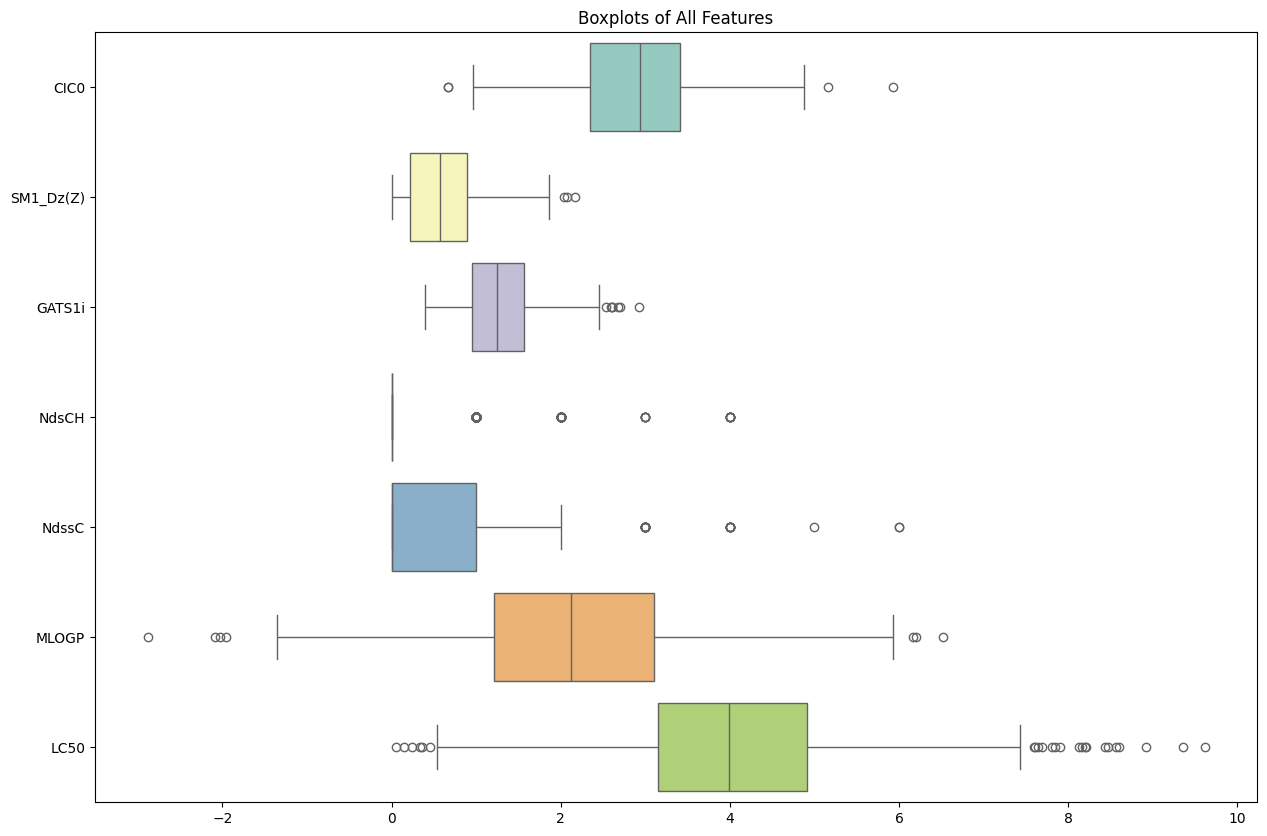

In [64]:
# Visualize outliers using boxplots for each column
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set3")
plt.title("Boxplots of All Features")



- Using percentile basesd capping method to reduce the effect of outliers without completely removing them.
-  Replacing extreme outliers with the nearest value within the 5th and 95th percentile

In [70]:
df_numeric_only = df.drop('LC50_Category',axis=1)

In [75]:
def cap_outliers(df_numeric_only, lower_quantile=0.05, upper_quantile=0.95):
    
    lower_bound = df_numeric_only.quantile(lower_quantile)
    upper_bound = df_numeric_only.quantile(upper_quantile)
    
    df_capped = df_numeric_only.copy()
    df_capped = np.where(df_numeric_only < lower_bound, lower_bound, df_capped)
    df_capped = np.where(df_numeric_only > upper_bound, upper_bound, df_capped)
    
    return pd.DataFrame(df_capped, columns=df_numeric_only.columns)

data_capped = cap_outliers(df_numeric_only)

data_capped = pd.DataFrame(data_capped, columns=df_numeric_only.columns)
print("Data records that handled by capping")
data_capped.head()


Data records that handled by capping


,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0.0,1.0,1.453,3.770
1,2.189,0.580,0.863,0.0,0.0,1.348,3.115
2,2.125,0.638,0.831,0.0,0.0,1.348,3.531
3,3.027,0.331,1.472,1.0,0.0,1.807,3.510
4,2.094,0.827,0.860,0.0,0.0,1.886,5.390


In [74]:
data_capped.shape

(907, 7)

##### Checking the dataset is balanced or not

**Statistical analysis to find out the data balance**

In [85]:
class_counts = df['LC50_Category'].value_counts()
total_samples = len(df)

In [87]:
# 1. Gini Index Calculation
gini_index = 1 - sum((class_counts / total_samples) ** 2)
print(f"\nGini Index: {gini_index:.4f}")
if gini_index < 0.1:
    print("Conclusion: The dataset is highly imbalanced.")
else:
    print("Conclusion: The dataset is relatively balanced.")


Gini Index: 0.3582
Conclusion: The dataset is relatively balanced.


In [88]:
# 2. Entropy Calculation
entropy = -sum((class_counts / total_samples) * np.log2(class_counts / total_samples))
print(f"\nEntropy: {entropy:.4f}")
max_entropy = np.log2(len(class_counts))  # Maximum possible entropy with this number of classes
print(f"Maximum Entropy: {max_entropy:.4f}")
if entropy / max_entropy < 0.7:
    print("Conclusion: The dataset is imbalanced.")
else:
    print("Conclusion: The dataset is relatively balanced.")


Entropy: 0.7845
Maximum Entropy: 1.0000
Conclusion: The dataset is relatively balanced.


In [89]:
# 3. Imbalance Ratio
imbalance_ratio = min(class_counts) / max(class_counts)
print(f"\nImbalance Ratio: {imbalance_ratio:.4f}")
if imbalance_ratio < 0.2:
    print("Conclusion: The dataset is highly imbalanced.")
else:
    print("Conclusion: The dataset is relatively balanced.")



Imbalance Ratio: 0.3050
Conclusion: The dataset is relatively balanced.


**Insights:**

- From all these statistical insights it is showing that dataset is balanced up to the considering criteria 
- The histogram with kernel density estimation suggest that it follows a normal distribution, it indirectly supports the data balance
- The analysed pairplot also supports the hypothesis of the balanced dataset due to the equal distribution of 2 classes in most of the features

##### Conclusion

- Cleaned dataset with only one duplicate entry and null missing values 
- There were only few outliers present and all those were handled without removing any
- MLOGP descriptor shown a great impact on correlation and rest were not that significant
- The dataset was partially balanced but its not creating a huge impact on the downstream analysis
